# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.326532e+01     7.269743e+00
 * time: 0.005656003952026367
     1     3.004297e+01     4.207079e+00
 * time: 0.015986204147338867
     2     2.415286e+01     7.805402e+00
 * time: 0.041825056076049805
     3     1.459493e+01     2.393400e+00
 * time: 0.07193708419799805
     4     1.429480e+01     3.614355e+00
 * time: 0.09097409248352051
     5     1.301348e+01     1.787016e+00
 * time: 0.11018013954162598
     6     1.039496e+01     1.269386e+00
 * time: 0.129256010055542
     7     9.859179e+00     1.004615e+00
 * time: 0.14874815940856934
     8     9.174978e+00     9.698248e-01
 * time: 0.16802310943603516
     9     8.891915e+00     5.825989e-01
 * time: 0.18845820426940918
    10     8.744243e+00     4.072408e-01
 * time: 0.2074570655822754
    11     8.707743e+00     7.424917e-01
 * time: 0.2216041088104248
    12     8.661300e+00     5.667392e-01
 * time: 0.23644614219665527
    13     8.594643e+00     3.897562e-01
 * time: 

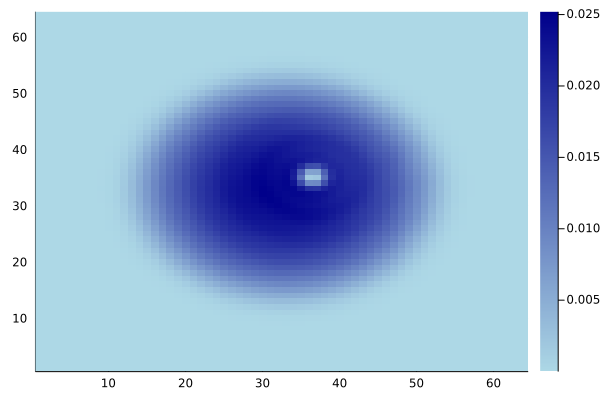

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)